# Data Science Fundamentals Final Project
### - Phil Roesch and Frankie Guarino

## Introduction

Our project was an analysis into a credit card dataset. Our data set came with the initial problem of predicting when customers would churn, however, we expanded upon this project by including an estimation of time to be spent with the company as well as a credit card recommender.

# Data Set
Our data set comes from https://www.kaggle.com/sakshigoyal7/credit-card-customers

<b>Description:</b><br/>
`A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.`


# Methods
We primarily used pandas dataframes with the addition of numpy, as well as matplotlib and seaborn for graphing.

In [1]:
# !unzip archive.zip
# !rm archive.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

data = pd.read_csv('BankChurners.csv')
print(data.shape)
del data['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del data['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
print(data.columns)
data.head()

(10127, 23)
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Our data contains 21 columns:
<ol>
    <li>Client Number</li>
    <li>Attrition_Flag - ['Existing Customer', 'Attrited Customer']</li>
    <li>Customer_Age - range [26,73]</li>
    <li>Gender - ['M', 'F']</li>
    <li>Dependent_count - range [0, 5]</li>
    <li>Education_level - ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']</li>
    <li>Martial_Status - ['Single', 'Married', 'Divorced', 'Unknown']</li>
    <li>Income_Category - ['Less than $40K', '$60K - $80K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']</li>
    <li>Card_Category - ['Blue', 'Silver', 'Gold', 'Platinum']</li>
    <li>Months_on_book - 'Period of relationship with bank'</li>
    <li>Total_Relationship_Count - Total no. of products held by the customer</li>
    <li>Months_Inactive_12_mon - No. of months inactive in the last 12 months</li>
    <li>Contacts_Count_12_mon - No. of Contacts in the last 12 months</li>
    <li>Credit_Limit - Credit Limit on the Credit Card</li>
    <li>Total_Revolving_Bal - Total Revolving Balance on the Credit Card</li>
    <li>Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)</li>
    <li>Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)</li>
    <li>Total_Trans_Amt - Total Transaction Amount (Last 12 months)</li>
    <li>Total_Trans_Ct - Total Transaction Count (Last 12 months)</li>
    <li>Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1)</li>
    <li>Avg_Utilization_Ratio - Average Card Utilization Ratio</li>
</ol>
*<i>two columns were dropped, dealing with naive bayes</i>

## Demographic Information

In [3]:
def make_bar(cat) :
    data.groupby(cat).size().plot(kind='bar', title=cat, label="")
def make_pie(cat) :
    data.groupby(cat).size().plot(kind='pie', autopct='%.1f', title=cat, label="")

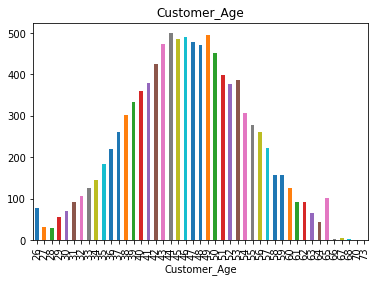

In [4]:
make_bar('Customer_Age')

Normal distribution of ages

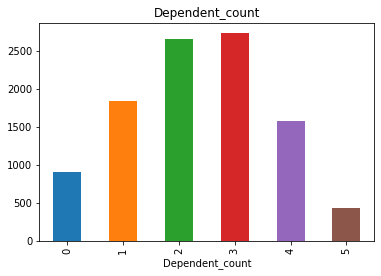

In [5]:
make_bar('Dependent_count')

Majority are responsible for dependent(s)

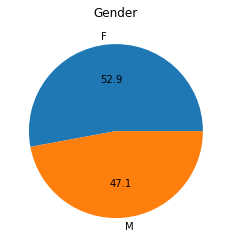

In [6]:
make_pie('Gender')

Even gender split

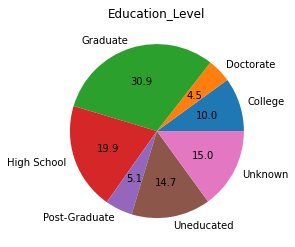

In [7]:
make_pie('Education_Level')

Most are college educated

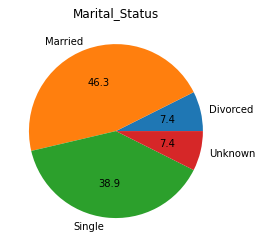

In [8]:
make_pie('Marital_Status')

Relatively even split between single and unmarried

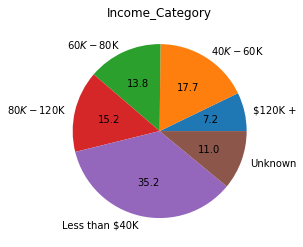

In [9]:
make_pie('Income_Category')

At least one third of users are low-income

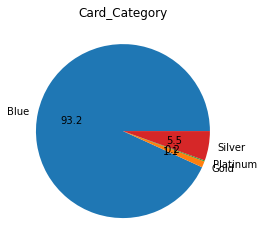

In [10]:
make_pie('Card_Category')

An overwhelming majority of customers (93.2%) have a Blue card

## Attrition Predictor
Seek to determine if a customer is going to churn and leave the service.

In [11]:
x = data.drop(['Attrition_Flag','CLIENTNUM'], axis=1)

The following transformations are applied:
<li>Gender and Marital are converted to 1s (Male) and 0s (Female)</li>
<li>LabelBinarizer for one hot encoding</li>

In [12]:
x['Gender'] = np.where(x['Gender'] == 'M', 1, 0)
x['Marital_Status'] = np.where(x['Marital_Status'] == 'Married', 1, 0)
x = x.drop(['Education_Level', 'Income_Category', 'Card_Category'], axis=1)

from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(data.Education_Level)
w = LabelBinarizer().fit_transform(data.Income_Category)
z = LabelBinarizer().fit_transform(data.Card_Category)

x['Education_Level_College'] = y[:,0]
x['Education_Level_Doctorate'] = y[:, 1]
x['Education_Level_Graduate'] = y[:, 2]
x['Education_Level_High School'] = y[:, 3]
x['Education_Level_Post-Graduate'] = y[:, 4]
x['Education_Level_Uneducated'] = y[:, 5]
x['Education_Level_Unknown'] = y[:, 6]

x['Income_Category_$120K +'] = w[:, 0]
x['Income_Category_$40K - $60K'] = w[:, 1]
x['Income_Category_$60K - $80K'] = w[:, 2]
x['Income_Category_$80K - $120K'] = w[:, 3]
x['Income_Category_Less than $40K'] = w[:, 4]
x['Income_Category_Unknown'] = w[:, 5]


x['Card_Category_Blue'] = z[:, 0]
x['Card_Category_Gold'] = z[:, 1]
x['Card_Category_Platinum'] = z[:, 2]
x['Card_Category_Silver'] = z[:, 3]

Select target column, our Attrition Flag

In [13]:
target = data['Attrition_Flag']

Train and learn

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=1)

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)
y_model.shape

(2026,)

In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_model))

Accuracy Score:  0.8998025666337611


The is a high accuracy score and therefore a good model to predict if someone will churn.

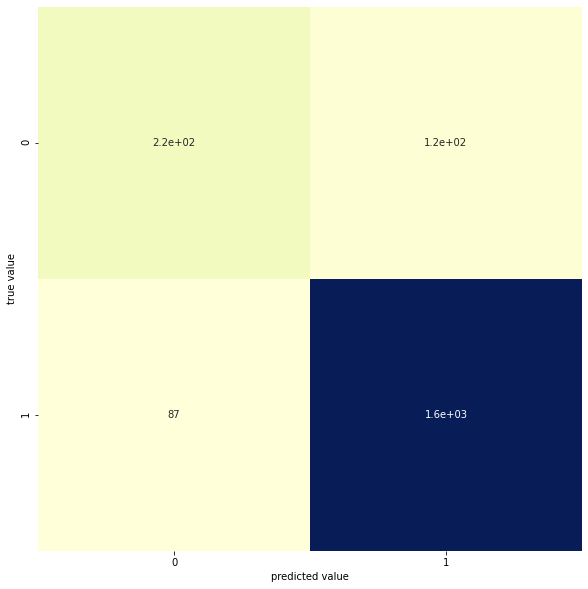

In [17]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='YlGnBu') #flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.savefig('Attrition_Flag_Predictor_Heatmap.png', dpi=300)

## Months on Book Predictor
Predict how long a customer will use the credit card.

In [18]:
x = x.drop(['Months_on_book'], axis=1)

Select target column, Months on Book

In [19]:
target = data['Months_on_book']

Training and learning

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=1)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)
y_model.shape

(2026,)

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_model))

Accuracy Score:  0.17670286278381048


This is a low accuracy score and therefore not a good model.

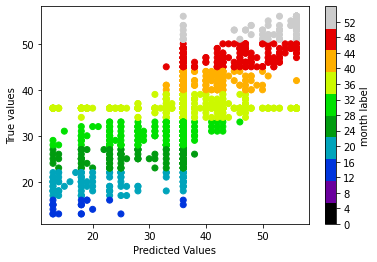

In [22]:
plt.scatter(y_model, y_test, c=y_test, cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar(label='month label', ticks=range(0,56, 4))
plt.clim(0, 56)
plt.xlabel('Predicted Values')
plt.ylabel('True values')
plt.savefig('Months_on_book scatter.png', dpi=300)

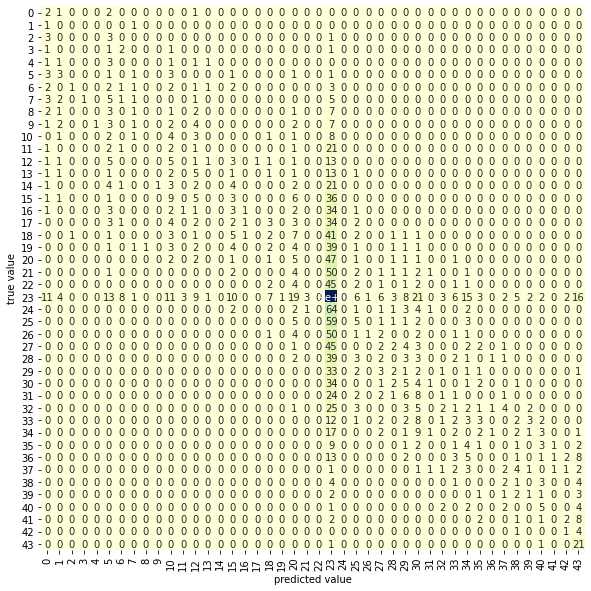

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='YlGnBu') #flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.savefig('Months_on_book_Heatmap.png', dpi=300)

## Credit Card Recommender
### Based on a user's demographics, recommend a credit card color for them

Separate demographic information (columns 3 to 7) and use one-hot-encoding to transform the dataframe, predict the credit card one uses

In [24]:
demo_df = data[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
# demo_df.set_index('CLIENTNUM', inplace=True)
card = demo_df[['Card_Category']]
# print(demo_df.head())
disc_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category']
cont_cols = ['Customer_Age', 'Dependent_count']

We encode the discrete information using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">One Hot Encoding</a> to then feed into a decision tree classifier to help select users. We can use this as a credit card recommender system.

In [25]:
from sklearn.preprocessing import OneHotEncoder
del demo_df['Card_Category']

def encode(_data, _disc_cols, _cont_cols):
    
    disc_df = _data[_disc_cols]
    cont_df = _data[_cont_cols]
    
    _enc = OneHotEncoder()
    return _enc.fit(disc_df)

def create_df(_data, _enc, _disc_cols = disc_cols, _cont_cols = cont_cols):   
    hot_df = pd.DataFrame(data=_enc.transform(_data[_disc_cols]).toarray(), columns=_enc.get_feature_names())
    return pd.concat([_data[_cont_cols], hot_df], axis=1)

enc = encode(demo_df, disc_cols, cont_cols)    
enc.get_feature_names()
rec_df = create_df(demo_df, enc)

# print(rec_df.size)
# print(rec_df.columns)
rec_df.head()

,Customer_Age,Dependent_count,x0_F,x0_M,x1_College,x1_Doctorate,x1_Graduate,x1_High School,x1_Post-Graduate,x1_Uneducated,...,x2_Divorced,x2_Married,x2_Single,x2_Unknown,x3_$120K +,x3_$40K - $60K,x3_$60K - $80K,x3_$80K - $120K,x3_Less than $40K,x3_Unknown
0,45,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,51,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,40,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Import our decision tree model and fit it to our data

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf.fit(rec_df, card)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
#creates random data

import random

def get_cats(_data, _col):
    return np.sort(_data[_col].unique())

def create_item():
    my_data = [random.randint(26,73),
               get_cats(demo_df, 'Gender')[random.randint(0,1)],
               get_cats(demo_df, 'Dependent_count')[random.randint(0,5)],
               get_cats(demo_df, 'Education_Level')[random.randint(0,6)],
               get_cats(demo_df, 'Marital_Status')[random.randint(0,3)],
               get_cats(demo_df, 'Income_Category')[random.randint(0,5)]]
    return my_data
# pred = pd.DataFrame(data=[create_item()], columns=demo_df.columns)
# pred.head()
# my_df = create_df(pred, enc)
# clf.predict(my_df)

Test model accuracy against itself

In [28]:
recommend = clf.predict(rec_df)
(card['Card_Category'] == recommend).sum() / recommend.size

0.9344327046509332

Split into stratified samples for different models

[Text(164.24012848571246, 213.41333333333333, 'X[0] <= 38.5\ngini = 0.75\nsamples = 10127\nvalue = [2531.75, 2531.75, 2531.75, 2531.75]'),
 Text(37.33853506714019, 205.36, 'X[12] <= 0.5\ngini = 0.662\nsamples = 1703\nvalue = [431.707, 327.381, 0.0, 360.375]'),
 Text(29.824146036395685, 197.30666666666667, 'X[9] <= 0.5\ngini = 0.664\nsamples = 978\nvalue = [241.477, 261.905, 0.0, 301.073]'),
 Text(22.93277154189133, 189.25333333333333, 'X[11] <= 0.5\ngini = 0.663\nsamples = 836\nvalue = [206.597, 261.905, 0.0, 246.332]'),
 Text(12.593838396930733, 181.2, 'X[0] <= 28.5\ngini = 0.659\nsamples = 734\nvalue = [181.376, 261.905, 0.0, 209.839]'),
 Text(1.3330900041476565, 173.14666666666668, 'X[14] <= 0.5\ngini = 0.492\nsamples = 91\nvalue = [23.343, 0.0, 0.0, 18.247]'),
 Text(0.4443633347158855, 165.09333333333333, 'X[0] <= 27.5\ngini = 0.417\nsamples = 83\nvalue = [21.733, 0.0, 0.0, 9.123]'),
 Text(0.22218166735794276, 157.04, 'gini = -0.0\nsamples = 70\nvalue = [18.782, 0.0, 0.0, 0.0]'),
 

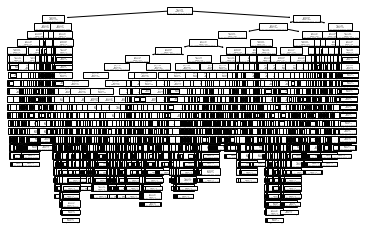

In [29]:
tree.plot_tree(clf)

# Discussion
While we were able to accurately predict wether a customer would churn, predicting their timespent was much harder. Therefore, it can be determined that it is easier to use signs to predict their soon departure rather than a long term service.

The decision tree helps to use previous data to recommend a card to a user based on their demographic information. The recommender would help the business quickly assign customers a card type.

# Future work
Future goals of this project include a live deployment of the credicard recommender.